# Homework 7

## Akshay Prakash

## Supprt Vector Machine 

In [1]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

# You're allowed to use only the above libraries that are imported. No other libs should be used in this assignment. 

## Heart Dataset 

In this Assignment we will work with some patients dataset. 

We have access to 303 patients data. The features are listed below. 

In [2]:
# Your code here
heart_df = pd.read_csv("Heart.csv")
heart_df

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


**Age:** The person’s age in years

**Sex:** The person’s sex (1 = male, 0 = female)

**ChestPain:** chest pain type

* Value 0: asymptomatic
* Value 1: atypical angina
* Value 2: non-anginal pain
* Value 3: typical angina

**RestBP:** The person’s resting blood pressure (mm Hg on admission to the hospital)

**Chol:** The person’s cholesterol measurement in mg/dl

**Fbs:** The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: resting electrocardiographic results

* Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
* Value 1: normal
* Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

**RestECG:** The person’s maximum heart rate achieved

**MaxHR:** Exercise induced angina (1 = yes; 0 = no)

**Oldpeak:** ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot. See more here)

**Slope:** the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping

* 0: downsloping; 
* 1: flat; 
* 2: upsloping

**Ca:** The number of major vessels (0–3)

**Thal:** A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously

* Value 1: fixed defect (no blood flow in some part of the heart)
* Value 2: normal blood flow
* Value 3: reversible defect (a blood flow is observed but it is not normal)

**Target:** Heart disease (1 = no, 0= yes)

# Task - 1 (4 points)
We want to use **Suppert Vector Machine** to perdict if the patients will have heart problems or not. The column "Target" in our datasets includes data about heart diseases. If the patient had heart disease we have a 1 and if not a zero. 

Prepare your data set for predicting heart disease ("Target" column) out of 3 features:

* Age of the patient (Column **"Age"**)
* Gender of the patient (male or female - Column **"Sex"**)
* Cholestrol level of the patient (Column **"Chol"**) 


Split your data into 80% traning data and 20% test data, and implement Support Vector Machine using Scikit-Learn. 





### pre-processing the data

In [3]:
#creating the x - dataframe - that containts the relevant independent variables / features being used to predict/ classify the condition.
X = heart_df[["Age", "Sex", "Chol"]]
X

,Age,Sex,Chol
0,63,1,233
1,67,1,286
2,67,1,229
3,37,1,250
4,41,0,204
...,...,...,...
298,45,1,264
299,68,1,193
300,57,1,131
301,57,0,236


In [4]:
#create y - np array that
y = np.where(heart_df["Target"] == "No", 0, 1)
y

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [5]:
X = X.to_numpy()

In [6]:
X

array([[ 63,   1, 233],
       [ 67,   1, 286],
       [ 67,   1, 229],
       [ 37,   1, 250],
       [ 41,   0, 204],
       [ 56,   1, 236],
       [ 62,   0, 268],
       [ 57,   0, 354],
       [ 63,   1, 254],
       [ 53,   1, 203],
       [ 57,   1, 192],
       [ 56,   0, 294],
       [ 56,   1, 256],
       [ 44,   1, 263],
       [ 52,   1, 199],
       [ 57,   1, 168],
       [ 48,   1, 229],
       [ 54,   1, 239],
       [ 48,   0, 275],
       [ 49,   1, 266],
       [ 64,   1, 211],
       [ 58,   0, 283],
       [ 58,   1, 284],
       [ 58,   1, 224],
       [ 60,   1, 206],
       [ 50,   0, 219],
       [ 58,   0, 340],
       [ 66,   0, 226],
       [ 43,   1, 247],
       [ 40,   1, 167],
       [ 69,   0, 239],
       [ 60,   1, 230],
       [ 64,   1, 335],
       [ 59,   1, 234],
       [ 44,   1, 233],
       [ 42,   1, 226],
       [ 43,   1, 177],
       [ 57,   1, 276],
       [ 55,   1, 353],
       [ 61,   1, 243],
       [ 65,   0, 225],
       [ 40,   1

In [7]:
#create the test/train split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True)

### implementing the support-vector machine using the scikit-learn library

In [8]:
from sklearn import svm

model = svm.SVC()
model.fit(X_train, y_train)

SVC()

# Task 2 - (4 points)

Cacluate the accuracy, Precision, Recall and F1 score of your **SVM** implementaion. 
Print the results. 


In [9]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.80      0.67        35
           1       0.46      0.23      0.31        26

    accuracy                           0.56        61
   macro avg       0.52      0.52      0.49        61
weighted avg       0.53      0.56      0.52        61



# Task 3 - Implement SVM without using libraries  - (4 points)

Implement SVM from scratch using Hinge Loss function and Gradient Descent. 
Try to produce the same result as you get from the libraries. 


* Do as many iterations as needed 
* Do maximum **100 iterations**
* Use a very small learning rate for checking your GD implementation. 
* Your are allowed to use your choice of learning rate, like using 0.0001, 0.001 or 0.01 or 0.1 or higher. 
* Visualize your costs. 
* No need to add an y-intercept in this task. 
* You can use libraries to report accuracy, Precision, Recall and F1. 



In [10]:
def compute_cost(X, y, W, regularization_factor):
    
    n = X.shape[0]
    distances = 1 - y * np.dot(X, W)
    
    distances[distances < 0] = 0
    
    hinge_loss = regularization_factor * (np.sum(distances) / n)
    
    return (1/2 * np.dot(W, W) + hinge_loss)


In [11]:
def calculate_gradient( X, y, W, regularization_factor):
    
    if type(y) == np.float64:
        
        y = np.array([y])
        X = np.array([X])
        
    distance = 1 - ( y *  np.dot(X, W))
    
    dw = np.zeros(len(W))
    
    for ind, d in enumerate(distance):
        
        if (d < 0) :
            di = W
        else:
            di = W - (regularization_factor * y[ind] * X[ind])
            
        dw += di
        
    dw = dw/len(y)
    
    return dw


In [12]:
weights = np.zeros(3)

num_iterations = 100
learning_rate = 0.0001

regularization = 0.01

cost_list = []

for i in range(0, num_iterations):
    
    cost = compute_cost(X_train, y_train, weights, regularization)
    
    print("Epoch", i , "Cost:", cost, "weights", weights)
    
    cost_list.append(cost)
    
    grad = calculate_gradient(X_train, y_train, weights, regularization)
    
    weights = weights - learning_rate * grad

Epoch 0 Cost: 0.01 weights [0. 0. 0.]
Epoch 1 Cost: 0.009851825212538558 weights [2.66115702e-05 3.71900826e-07 1.18785124e-04]
Epoch 2 Cost: 0.009703680058552856 weights [5.32204793e-05 7.43764463e-07 2.37558369e-04]
Epoch 3 Cost: 0.009555564532116503 weights [7.98267275e-05 1.11559091e-06 3.56319738e-04]
Epoch 4 Cost: 0.009407478627304282 weights [1.06430315e-04 1.48738018e-06 4.75069230e-04]
Epoch 5 Cost: 0.009259422338192163 weights [1.33031242e-04 1.85913227e-06 5.93806847e-04]
Epoch 6 Cost: 0.009111395658857303 weights [1.59629509e-04 2.23084718e-06 7.12532590e-04]
Epoch 7 Cost: 0.008963398583378043 weights [1.86225117e-04 2.60252492e-06 8.31246461e-04]
Epoch 8 Cost: 0.008815431105833911 weights [2.12818064e-04 2.97416550e-06 9.49948460e-04]
Epoch 9 Cost: 0.008667493220305612 weights [2.39408353e-04 3.34576891e-06 1.06863859e-03]
Epoch 10 Cost: 0.008519584920875036 weights [2.65995982e-04 3.71733516e-06 1.18731685e-03]
Epoch 11 Cost: 0.008371706201625268 weights [2.92580953e-04 4

Epoch 93 Cost: 0.005386837615693391 weights [1.17226997e-03 1.70556101e-05 4.84342184e-03]
Epoch 94 Cost: 0.0053862337301452895 weights [1.17473125e-03 1.70952268e-05 4.85079287e-03]
Epoch 95 Cost: 0.005385629965368259 weights [1.17719229e-03 1.71348396e-05 4.85816317e-03]
Epoch 96 Cost: 0.0053850263213381456 weights [1.17965308e-03 1.71744484e-05 4.86553272e-03]
Epoch 97 Cost: 0.005384422798030802 weights [1.18211363e-03 1.72140533e-05 4.87290154e-03]
Epoch 98 Cost: 0.0053838193954220855 weights [1.18457393e-03 1.72536542e-05 4.88026962e-03]
Epoch 99 Cost: 0.005383216113487856 weights [1.18703399e-03 1.72932512e-05 4.88763697e-03]


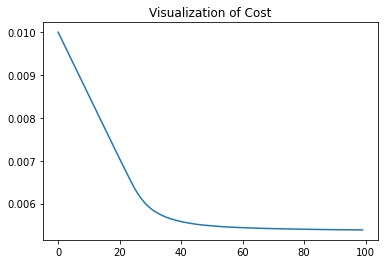

In [13]:
plt.plot(np.arange(num_iterations), cost_list)
plt.title("Visualization of Cost")
plt.show()

In [14]:
y_predict_no_library = np.where(np.dot(X_test, weights) < 1, 0, 1)
y_predict_no_library

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [15]:
print(classification_report(y_test, y_predict_no_library))

              precision    recall  f1-score   support

           0       0.55      0.17      0.26        35
           1       0.42      0.81      0.55        26

    accuracy                           0.44        61
   macro avg       0.48      0.49      0.41        61
weighted avg       0.49      0.44      0.39        61



# Task 4 - Compare SVM results with Logistic Regression - (4 points)

Which model performs better here? Compare your results with the logistic regression. You can use libraries for this task. 


In [16]:
from sklearn.linear_model import LogisticRegression

regression_model = LogisticRegression()
regression_model.fit(X_train, y_train)


y_pred_lr = model.predict(X_test)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.58      0.80      0.67        35
           1       0.46      0.23      0.31        26

    accuracy                           0.56        61
   macro avg       0.52      0.52      0.49        61
weighted avg       0.53      0.56      0.52        61



There appears to be no difference in terms of the classification accuracy between the sci-kit learn logistic regression model and the sci-kit learn support vector machine model. Both models have congruent values for precision, recall, and accuracy. Notably, both of these models outperformed the no-library SVM implementation in accuracy  and precision, but not recall.

# Task 5 - Apply a kernel function to improve SVM performance (4 points)

Use the Scikit-learn library and apply a kernel function to improve the SVM performance. Check if this is possible. 


In [17]:
kernel_svm = svm.SVC(kernel = 'linear')
kernel_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
kernel_svm_predict = kernel_svm.predict(X_test)
print(classification_report(y_test, kernel_svm_predict))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74        35
           1       0.65      0.77      0.70        26

    accuracy                           0.72        61
   macro avg       0.72      0.73      0.72        61
weighted avg       0.73      0.72      0.72        61



The use of a linear kernel in the support vector machine increases the accuracy, precision, and recall metrics.